In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
import numpy as np
import math
import cmath


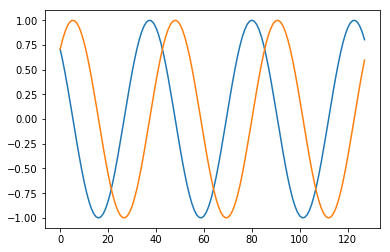

In [38]:
N = 128
m = 3
phase_shift = math.pi/4
x = np.array([cmath.exp(1j * (2 * math.pi/N*m*n + phase_shift))
              for n in range(N)])
plt.plot(x.real)
plt.plot(x.imag)

In [23]:
N = 8
basis_mat_8 = np.array([cmath.exp(-1j*2*math.pi/N*m*n)
                                for m in range(N) for n in range(N)]).reshape((N, N))

In [24]:
N = 4
basis_mat_4 = np.array([cmath.exp(-1j*2*math.pi/N*m*n)
                                for m in range(N) for n in range(N)]).reshape((N, N))

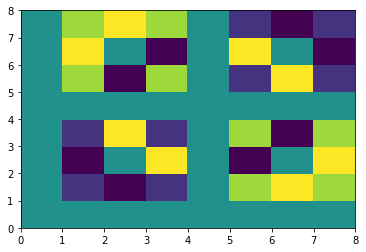

In [29]:
plt.pcolormesh(basis_mat_8.imag)

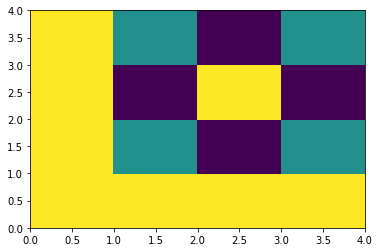

In [26]:
plt.pcolormesh(basis_mat_4.real)

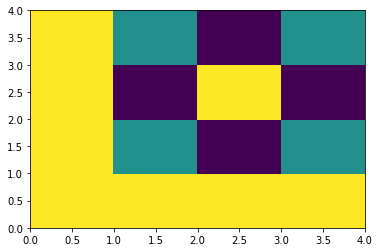

In [27]:
plt.pcolormesh(basis_mat_8[0:4, 0::2].real)

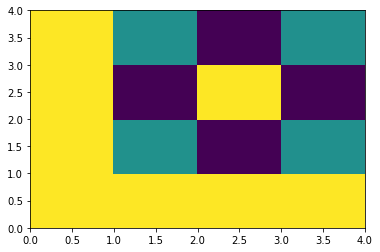

In [28]:
plt.pcolormesh(basis_mat_8[4:, 0::2].real)

C:\Users\Youn-Long Lin\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


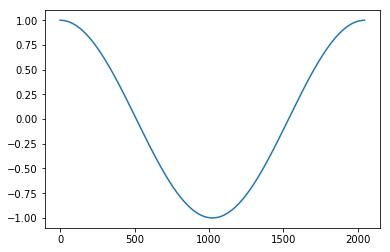

In [46]:
N = 2048
m = 1
x1 = np.array([cmath.exp(-1j*2*math.pi/N*m*n) for n in range(N)])
plt.plot(x1)

C:\Users\Youn-Long Lin\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


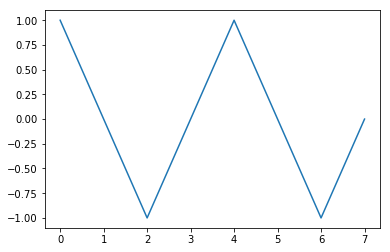

In [26]:
N = 8
m = 2
x2 = np.array([cmath.exp(-1j*2*math.pi/N*m*n) for n in range(N)])
plt.plot(x2)

In [2]:
def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for m in range(N):
        for n in range(N):
            X[m] += x[n] * cmath.exp(-1j*2*math.pi*m*n/N)
    return X

def idft(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for m in range(N):
            x[n] += X[m] * cmath.exp(1j*2*math.pi*m*n/N)
        x[n] = x[n] / N
    return x

def fft(x):
    N = len(x)
    Half_N = N // 2
    X = np.zeros(N, dtype = complex)
    if N == 1:
        X[0] = x[0]
    else:
        x_even = x[0::2]
        x_odd = x[1::2]
        X_even = fft(x_even)
        X_odd = fft(x_odd)
        for m in range(N):
            X[m] = X_even[m%Half_N] + X_odd[m%Half_N] * cmath.exp(-1j*2*math.pi*m/N)
    return X
        
def ifft(X):
    N = len(X)
    Half_N = N // 2
    x = np.zeros(N, dtype = complex)
    if N == 1:
        x[0] = X[0]
    else:
        X_even = X[0::2]
        X_odd = X[1::2]
        x_even = ifft(X_even)
        x_odd = ifft(X_odd)
        for n in range(N):
            x[n] = x_even[n%Half_N] + x_odd[n%Half_N] * cmath.exp(1j*2*math.pi*n/N)
    return x

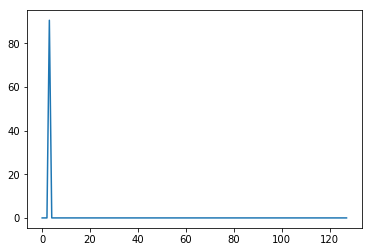

In [41]:
X = fft(x)
# plt.plot(X.real)
plt.plot(X.imag)

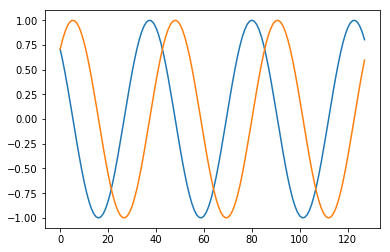

In [42]:
x_recover = ifft(X)/len(X)
plt.plot(x_recover.real)
plt.plot(x_recover.imag)

C:\Users\Youn-Long Lin\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


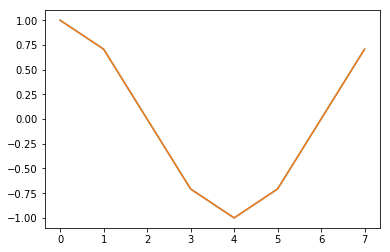

In [45]:
x1_reconst = idft(X1)
plt.plot(x1_reconst)
plt.plot(x1.real)

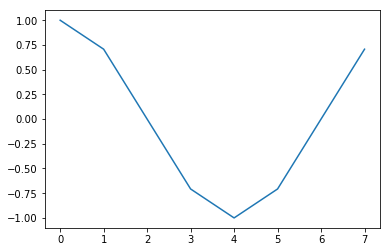

In [42]:
plt.plot(x1.real)

In [48]:
x

array([0, 5, 7, 3, 1, 0, 7, 2])

In [49]:
x[0::2]

array([0, 7, 1, 7])

In [50]:
x[1::2]

array([5, 3, 0, 2])

Sampling Freq 22050
Peak Freq 441.430664063


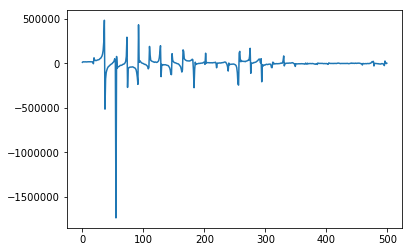

In [3]:
import scipy.io.wavfile as sw


fs, x = sw.read('violin22k.wav')
print ("Sampling Freq", fs)
plt.plot(fft(x[2048:4096])[0:500].real)
X = fft(x[20000:20000+4096])[0:500].real
X.argmax()
Hertz = fs/4096*X.argmax()
print ("Peak Freq", Hertz)

Sampling Freq 22050


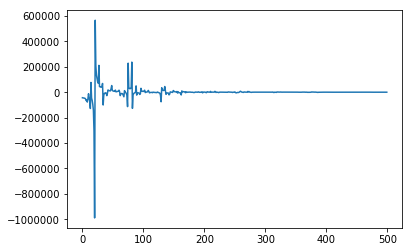

In [4]:


fs, x = sw.read('gtr-nylon22.wav')
print ("Sampling Freq", fs)
plt.plot(fft(x[2048:4096])[0:500].real)

In [55]:


fs, x = sw.read('pno-cs24k.wav')
print ("Sampling Freq", fs)
X = fft(x[20000:20000+4096])[0:500].real
X.argmax()
Hertz = fs/4096*X.argmax()
print ("Peak Freq", Hertz)

Sampling Freq 24000
Peak Freq 386.71875


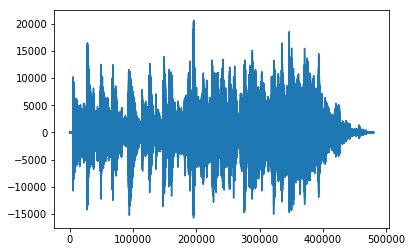